In [452]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt       

In [453]:
df = pd.read_csv('efficient_linear_regression_dataset.csv')


In [454]:
df.head()

,Feature_1,Feature_2,Feature_3,Target
0,37.454012,95.071431,73.199394,101.235703
1,59.865848,15.601864,15.599452,116.563460
2,5.808361,86.617615,60.111501,27.647509
3,70.807258,2.058449,96.990985,384.407386
4,83.244264,21.233911,18.182497,154.065504


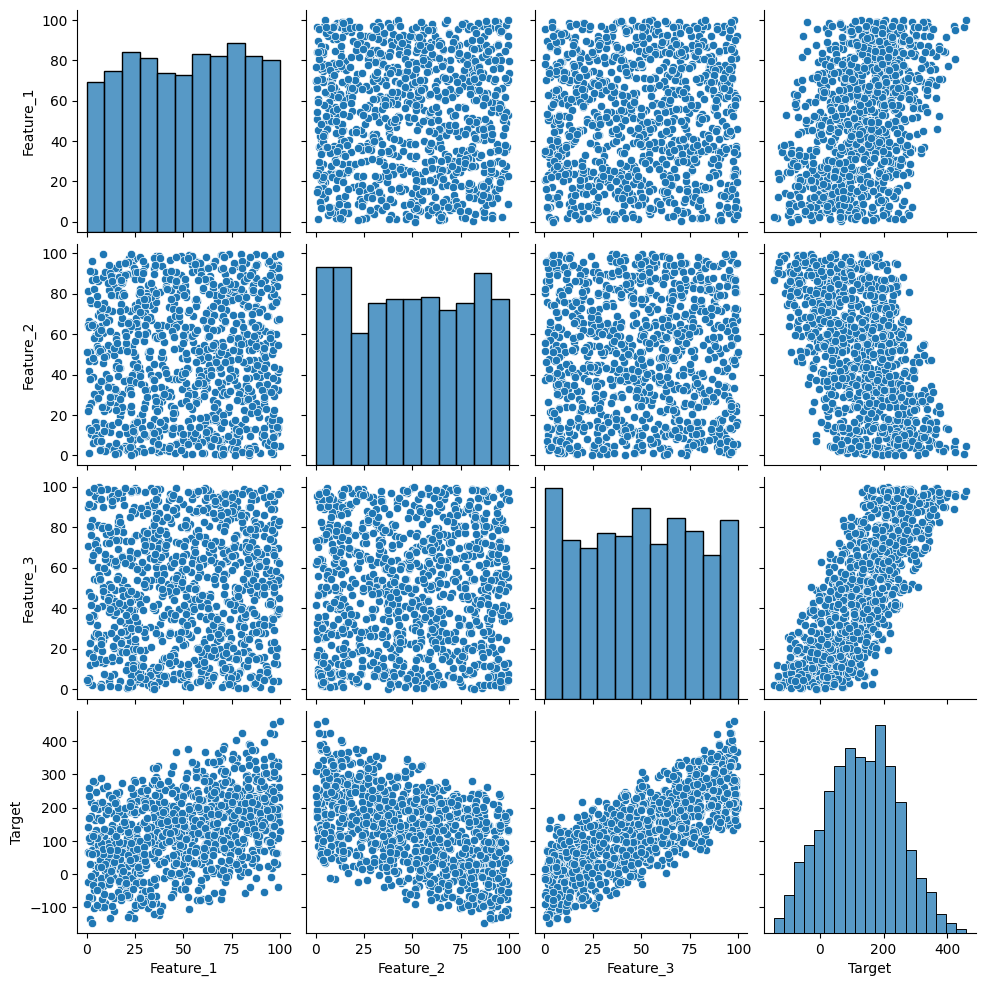

In [455]:
import seaborn as sns
sns.pairplot(df[['Feature_1', 'Feature_2', 'Feature_3', 'Target']])
plt.show()


In [456]:
X = df.iloc[:,:-1]
y = df['Target']

In [457]:
X.head()

,Feature_1,Feature_2,Feature_3
0,37.454012,95.071431,73.199394
1,59.865848,15.601864,15.599452
2,5.808361,86.617615,60.111501
3,70.807258,2.058449,96.990985
4,83.244264,21.233911,18.182497


In [458]:
from  sklearn.model_selection  import train_test_split

In [459]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=  0.20 , random_state=42)

In [460]:
X_train.shape , y_train.shape 

((800, 3), (800,))

In [461]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [462]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [463]:
from sklearn.linear_model import LinearRegression

In [464]:
model = LinearRegression()

In [465]:
model.fit(X_train ,y_train)

LinearRegression()

In [466]:
model.coef_


array([ 43.13876156, -59.20425627,  87.33575899])

In [467]:
model.intercept_


np.float64(131.18767652137373)

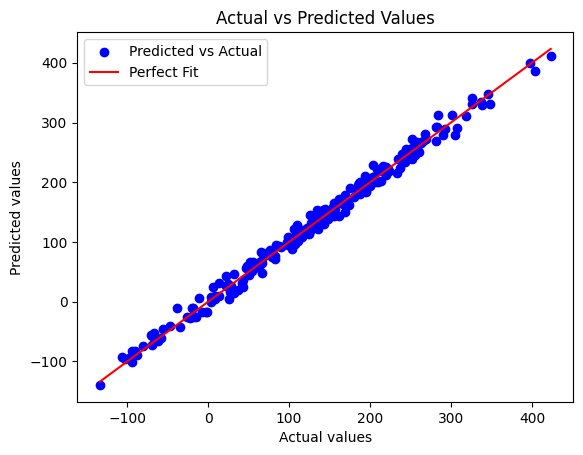

In [468]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')  # Actual vs Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')  # Perfect fit line

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


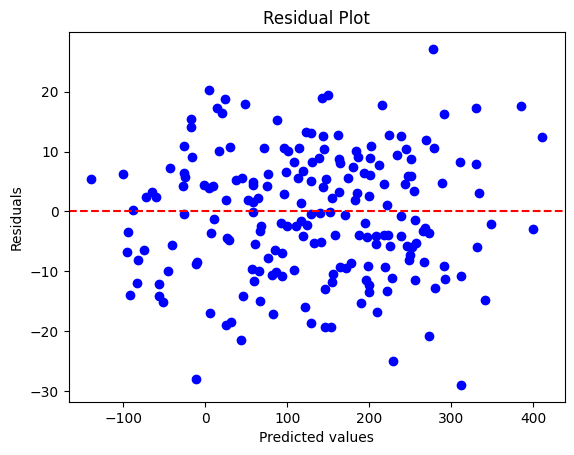

In [469]:
# Calculate residuals (differences between actual and predicted values)
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Line where residuals are 0 (perfect prediction)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


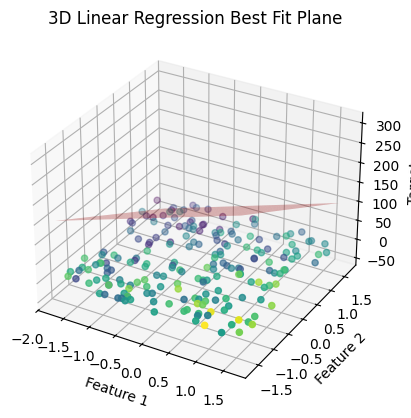

In [470]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot for the three features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual values (scatter plot)
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='viridis', label='Actual')

# Create a meshgrid for prediction surface
x = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
Z = model.predict(np.c_[X.ravel(), Y.ravel(), np.zeros_like(X.ravel())]).reshape(X.shape)

# Plot the predicted values (surface plot)
ax.plot_surface(X, Y, Z, color='r', alpha=0.3, label='Best Fit Plane')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title('3D Linear Regression Best Fit Plane')
plt.show()


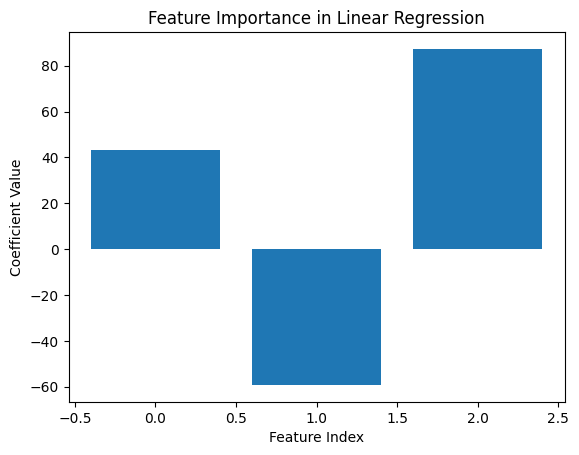

In [471]:
# Bar chart of feature importances (coefficients)
coefficients = model.coef_

# Plot feature importance
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()


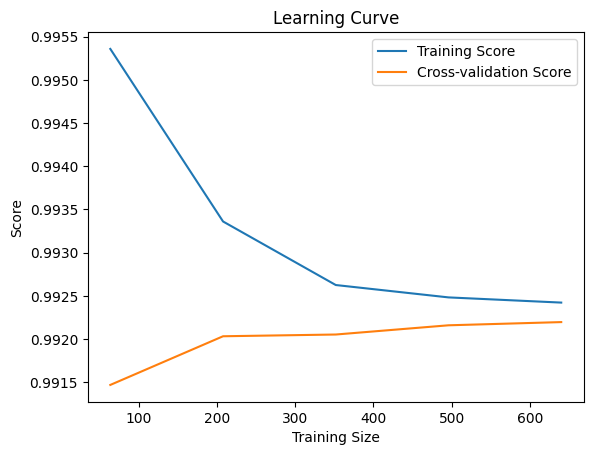

In [472]:
from sklearn.model_selection import learning_curve

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

# Plot learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [473]:
y_pred_test = model.predict(X_test)
y_pred_test

array([   9.0782767 ,  410.69742356,   31.67655329,   10.11429919,
         -9.71445369,   60.93784186,  143.37806726,  -25.60774036,
        218.30042188,  218.43246462,  -26.8481956 ,  250.80748688,
        116.26520929,  199.23739363,   85.20463858,  128.8808069 ,
        -71.81370591,  142.72057114,   67.33660334,  200.35424479,
        184.991307  ,  233.2862315 ,  141.04413437,   93.9406221 ,
         86.49540999,  331.72652053,  247.91969648,  -56.32684505,
        -24.23582883,  219.46883026,  113.86585382,  145.539168  ,
        170.86162067,  257.47843555,  149.81447808,  244.85903541,
         58.5104183 ,  251.35742838,   95.77344138,  -82.68382225,
        221.56873686,  -60.52849545, -139.22387737,  202.56545016,
        162.74400148,   97.96572524,  198.06281631,  211.9689132 ,
        116.8388439 ,  200.95677039,  249.8514254 ,  139.65384925,
        293.00109321,  -17.48132234,   58.32367244,  108.63213334,
        208.85114516,   81.90742132,   66.53966252,  164.88709

In [474]:
# performence matrix
# calsulate mse , mae , Rmse , R - squared , adjusted r - squared

from sklearn.metrics import mean_squared_error , mean_absolute_error 
mse = mean_squared_error(y_test , y_pred_test)
mae = mean_absolute_error(y_test , y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mse)
print(rmse)


108.56302164534594
108.56302164534594
10.419358024626371


In [475]:
from sklearn.metrics import r2_score 
score = r2_score(y_test , y_pred_test)
print(score)


0.9919694272806386


In [476]:
# Adjust Rsquare
1 - (1 - score)* (len(y_test)-1)/(len(y_test) -X_test.shape[1]-1)

0.9918465103512607

In [477]:
# new Data point  feature 1 = 70 , feature2 = 77  , freature 3= 90
feature1 = 70 
feature2 = 77 
feature3 = 90

scaled_target = scaler.transform([[feature1 , feature2,feature3]])
scaled_target


c:\Users\Kirit\anaconda3\envs\mlops_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.63055691, 0.91319418, 1.39080473]])

In [478]:

prediction = model.predict(scaled_target)

print("Target Prediction:", prediction)


Target Prediction: [225.79112552]


Text(0, 0.5, 'Y test prediction')

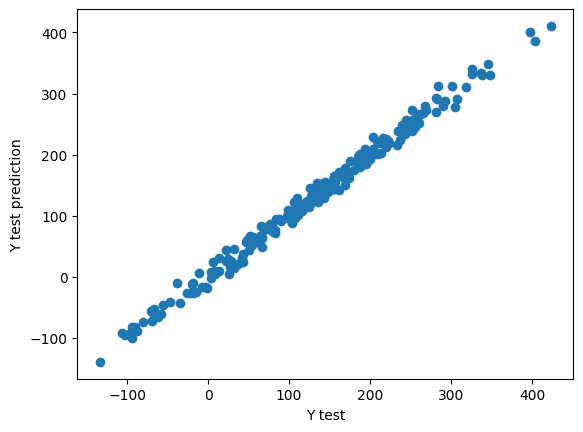

In [479]:
plt.scatter(y_test , y_pred_test)
plt.xlabel('Y test')
plt.ylabel('Y test prediction')

In [480]:
residuals = y_test - y_pred_test
residuals


521     4.325108
737    12.470097
740   -18.482803
660    -1.208044
411    -8.434053
         ...    
408   -11.527323
332    -2.976812
208     3.172338
613   -10.844148
78     10.861701
Name: Target, Length: 200, dtype: float64

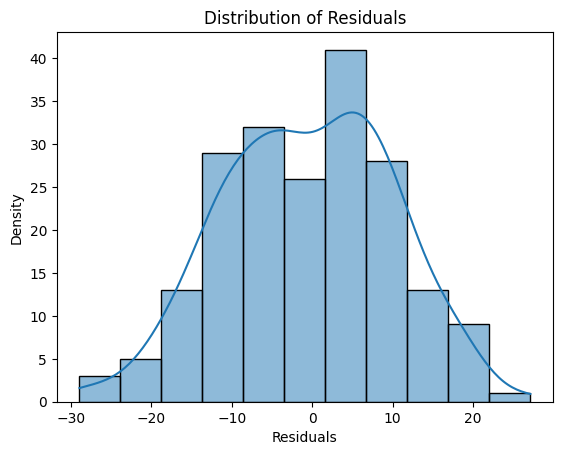

In [481]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()
